In [ ]:
#importing libraries
import requests
import json
import pandas as pd
import time

In [ ]:
#Authenication key
key= 'Uc8DQPyeVrwQHWcKPQweZPAi1QtZ5VBh'

In [ ]:
#Look at the different query parameter for different formats of books 
#User may choose 
url= "https://api.nytimes.com/svc/books/v3/lists/names.json?api-key=" + key
r = requests.get(url)

#request is successful
if (r.status_code == 200):
  name = r.json()
  print(json.dumps(name, sort_keys=True, indent= 2))

{
  "copyright": "Copyright (c) 2021 The New York Times Company.  All Rights Reserved.",
  "num_results": 59,
  "results": [
    {
      "display_name": "Combined Print & E-Book Fiction",
      "list_name": "Combined Print and E-Book Fiction",
      "list_name_encoded": "combined-print-and-e-book-fiction",
      "newest_published_date": "2021-05-23",
      "oldest_published_date": "2011-02-13",
      "updated": "WEEKLY"
    },
    {
      "display_name": "Combined Print & E-Book Nonfiction",
      "list_name": "Combined Print and E-Book Nonfiction",
      "list_name_encoded": "combined-print-and-e-book-nonfiction",
      "newest_published_date": "2021-05-23",
      "oldest_published_date": "2011-02-13",
      "updated": "WEEKLY"
    },
    {
      "display_name": "Hardcover Fiction",
      "list_name": "Hardcover Fiction",
      "list_name_encoded": "hardcover-fiction",
      "newest_published_date": "2021-05-23",
      "oldest_published_date": "2008-06-08",
      "updated": "WEEKLY"
 

In [ ]:
#Different formats (querying values) I chose
formats= ['e-book-fiction','e-book-nonfiction','hardcover-fiction', 'hardcover-nonfiction', 'trade-fiction-paperback', 'paperback-nonfiction','manga','paperback-graphic-books', 'series-books','young-adult' ]


In [ ]:
#Request function to pass each format
def request (format):
  #Requesting the best seller list for a specific format 
  urls = f"https://api.nytimes.com/svc/books/v3/lists/current/{format}.json?api-key=" + key
  r = requests.get(urls)

  #request is successful
  if (r.status_code == 200):
    data = r.json()
    print(json.dumps(data, sort_keys=True, indent= 2))
    return data
  #There is limit to how many requests you can make
  #If status code is 429, too many request in a given time, so stop for 1 second and then resume running requests
  elif (r.status_code== 429):
    time.sleep(1)
    return request(format)
  #Request is unsuccessful
  else:
    print(format)





In [ ]:
#Function to return the list of datas I want from format
# I want to know the title, author, isbn13, weeks_on_list, ranks, ranks last week, book image height, and book image width of a book in the format
def list(data):
  titles=[]
  authors=[]
  isbn13=[]
  weeks_on_list=[]
  ranks=[]
  ranks_last_week=[]
  books_image_height=[]
  books_image_width=[]

  #For loop to run through all data and append the needed data to the appropriate list above
  for i in range (0, len(data['results']['books'])):
    titles.append(data['results']['books'][i]['title'])
    authors.append(data['results']['books'][i]['author'])
    isbn13.append(data['results']['books'][i]['primary_isbn13']) 
    weeks_on_list.append(data['results']['books'][i]['weeks_on_list']) 
    ranks.append(data['results']['books'][i]['rank'])
    ranks_last_week.append(data['results']['books'][i]['rank_last_week'])
    books_image_height.append(data['results']['books'][i]['book_image_height'])
    books_image_width.append(data['results']['books'][i]['book_image_width'])

  return titles, authors, isbn13, weeks_on_list, ranks, ranks_last_week, books_image_height, books_image_width





In [ ]:
#Convert the lists into a dataframe 
def dataframe(titles, authors, isbn13, weeks_on_list, ranks, ranks_last_week, book_image_height, book_image_width):
  
  books= {'titles':titles,
          'authors': authors,
          'isbn13': isbn13,
          'weeks on list': weeks_on_list,
          'ranks': ranks,
          'ranks last week': ranks_last_week,
          'books image height': books_image_height,
          'books image width': books_image_width
  }
      
  books_df= pd.DataFrame(books)
  return books_df

  

In [ ]:
total_df = []

#for loop to run the formats and their results through each function above
for format in formats:
  r = request(format)
  titles, authors, isbn13, weeks_on_list, ranks, ranks_last_week, books_image_height, books_image_width = list(r)
  df= dataframe(titles, authors, isbn13, weeks_on_list, ranks, ranks_last_week, books_image_height, books_image_width)
  #append dataframe to a list
  total_df.append(df)




Streaming output truncated to the last 5000 lines.
            "url": "https://www.amazon.com/dp/0393356310?tag=NYTBSREV-20"
          },
          {
            "name": "Apple Books",
            "url": "https://du-gae-books-dot-nyt-du-prd.appspot.com/buy?title=NOMADLAND&author=Jessica+Bruder"
          },
          {
            "name": "Barnes and Noble",
            "url": "https://www.anrdoezrs.net/click-7990613-11819508?url=https%3A%2F%2Fwww.barnesandnoble.com%2Fw%2F%3Fean%3D9780393356311"
          },
          {
            "name": "Books-A-Million",
            "url": "https://du-gae-books-dot-nyt-du-prd.appspot.com/redirect?url1=https%3A%2F%2Fwww.anrdoezrs.net%2Fclick-7990613-35140%3Furl%3Dhttps%253A%252F%252Fwww.booksamillion.com%252Fp%252FNOMADLAND%252FJessica%252BBruder%252F9780393356311&url2=https%3A%2F%2Fwww.anrdoezrs.net%2Fclick-7990613-35140%3Furl%3Dhttps%253A%252F%252Fwww.booksamillion.com%252Fsearch%253Fquery%253DNOMADLAND%252BJessica%252BBruder"
          },
       

In [ ]:
#View all rows
pd.set_option('display.max_rows', None)
#concat dataframes together
total_df= pd.concat(total_df, ignore_index=True)
total_df

,titles,authors,isbn13,weeks on list,ranks,ranks last week,books image height,books image width
0,FULL PACKAGE,Lauren Blakely,A00B01MT5HMRV,1,1,0,495,310
1,THE GUERNSEY LITERARY AND POTATO PEEL PIE SOCIETY,Mary Ann Shaffer and Annie Barrows,9780440337973,2,2,0,495,314
2,THE WHISTLER,John Grisham,9780385541206,12,3,4,495,326
3,RING OF FIRE,Brad Taylor,9781101984772,1,4,0,495,328
4,SMALL GREAT THINGS,Jodi Picoult,9780345544964,9,5,7,491,330
5,SHELTER FOR ADELINE,Susan Stoker,A00B01MF62CN8,1,6,0,495,310
6,A MAN CALLED OVE,Fredrik Backman,9781476738031,3,7,9,495,318
7,THE MISTRESS,Danielle Steel,9780425285350,2,8,2,495,326
8,THE GUESTS ON SOUTH BATTERY,Karen White,9780698193000,1,9,0,495,328
9,NO MAN'S LAND,David Baldacci,9781455586493,8,10,0,495,327


In [ ]:
#Descriptive statistics
total_df.describe()

,weeks on list,ranks,ranks last week,books image height,books image width
count,135.000000,135.000000,135.000000,135.000000,135.000000
mean,47.392593,7.444444,3.140741,466.518519,310.785185
std,105.312265,4.190727,3.630639,82.712490,54.959467
min,0.000000,1.000000,0.000000,186.000000,128.000000
25%,1.000000,4.000000,0.000000,494.000000,321.500000
50%,6.000000,7.000000,2.000000,495.000000,329.000000
75%,48.000000,11.000000,6.000000,500.000000,330.000000
max,634.000000,15.000000,14.000000,500.000000,401.000000


In [ ]:
#Save dataframe to csv file
total_df.to_csv('NY Times Best Sellers.csv')

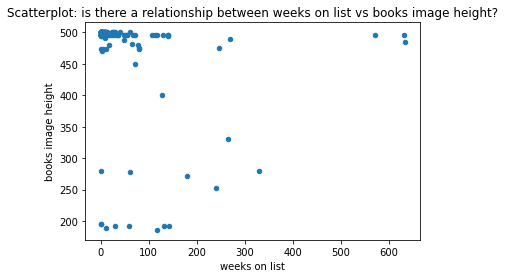

In [ ]:
#Scatterplot to show if there is a relationship between weeks on list vs books image height
total_df.plot(x="weeks on list", y= "books image height", title= "Scatterplot: is there a relationship between weeks on list vs books image height?", kind= "scatter")

According to the scatterplot, it seems like most of the books are clustered around a book image height of 500 with around 0-50 weeks on the best sellers' list. There is no strong relationship, but we can generally predict the height of a typical best seller book and how many weeks it typically remains on the list. 

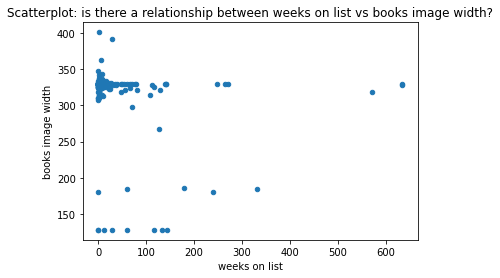

In [ ]:
#Scatterplot to show if there is a relationship between weeks on list vs books image width
total_df.plot(x="weeks on list", y= "books image width", title= "Scatterplot: is there a relationship between weeks on list vs books image width?", kind= "scatter")

According to the scatterplot, it seems like most of the books are clustered around a book image width of 325 with around 0-50 weeks on the best sellers' list. There is no strong relationship, but we can generally predict the width of a typical best seller book and how many weeks it typically remains on the list.